In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from wordcloud import WordCloud

In [ ]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
drugdata_path= "drug_review_test.csv"

In [ ]:
df = pd.read_csv(drugdata_path)

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


In [96]:
display(df.head(4))

,Unnamed: 0,patient_id,drugName,condition,review,rating,date,usefulCount,review_length,sentiment,cleaned_text,sentiment_label
0,0,163740,Mirtazapine,depression,"""i've tried a few antidepressants over the yea...",10.0,"February 28, 2012",22,68,positive,ive tried antidepressants years citalopram flu...,2
1,1,206473,Mesalamine,crohns disease maintenance,"""my son has crohn's disease and has done very ...",8.0,"May 17, 2009",17,48,positive,son crohns disease done well asacol complaints...,2
2,2,39293,Contrave,weight loss,"""contrave combines drugs that were used for al...",9.0,"March 5, 2017",35,143,positive,contrave combines drugs used alcohol smoking o...,2
3,3,97768,Cyclafem 1 / 35,birth control,"""i have been on this birth control for one cyc...",9.0,"October 22, 2015",4,149,positive,birth control one cycle reading reviews type s...,2


In [ ]:
df.columns

Index(['Unnamed: 0', 'patient_id', 'drugName', 'condition', 'review', 'rating',
       'date', 'usefulCount', 'review_length'],
      dtype='object')

In [ ]:
def determine_sentiment(rating):
    if rating >= 7:
        return 'positive'
    elif rating >= 4:
        return 'neutral'
    else:
        return 'negative'

In [ ]:
df['sentiment'] = df['rating'].apply(determine_sentiment)

In [ ]:
df['condition'] = df['condition'].fillna('Unknown').str.replace(r'[^a-zA-Z0-9\s]', '', regex=True)

In [ ]:
def preprocess_text(text):
    if pd.isnull(text):  # Handle missing values
        return ""
    text = str(text).lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove numbers and special characters
    words = word_tokenize(text)
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [ ]:
df['cleaned_text'] = df['review'].apply(preprocess_text)

In [ ]:
df = df[df['cleaned_text'].str.strip() != '']

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['cleaned_text'])

In [ ]:
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_label'] = df['sentiment'].map(sentiment_mapping)

In [ ]:
y = df['sentiment_label'].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.77


In [ ]:
precision = precision_score(y_test, y_pred, average='weighted')
print(f'Precision: {precision:.2f}')

Precision: 0.74


In [ ]:
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'F1 Score: {f1:.2f}')
print(f'Recall: {recall:.2f}')

F1 Score: 0.74
Recall: 0.77


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.63      0.66      2061
           1       0.44      0.14      0.22      1108
           2       0.81      0.94      0.87      6053

    accuracy                           0.77      9222
   macro avg       0.65      0.57      0.58      9222
weighted avg       0.74      0.77      0.74      9222



<ipython-input-88-64e5e273b865>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette='viridis')


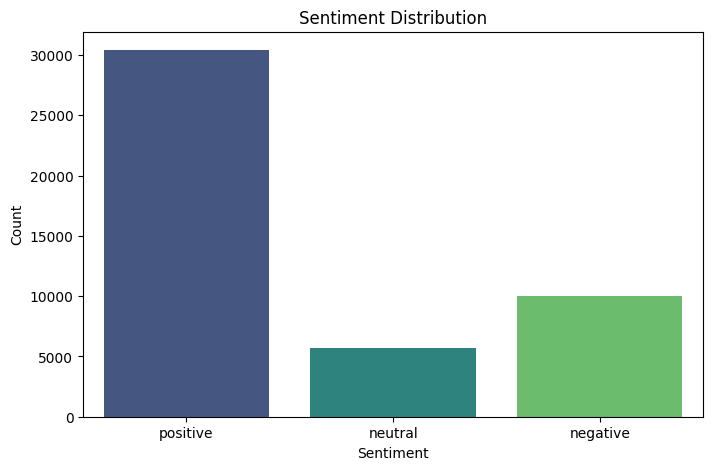

In [ ]:
plt.figure(figsize=(8, 5))
sns.countplot(x=df['sentiment'], palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [ ]:
text_data = ' '.join(df['cleaned_text'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text_data)

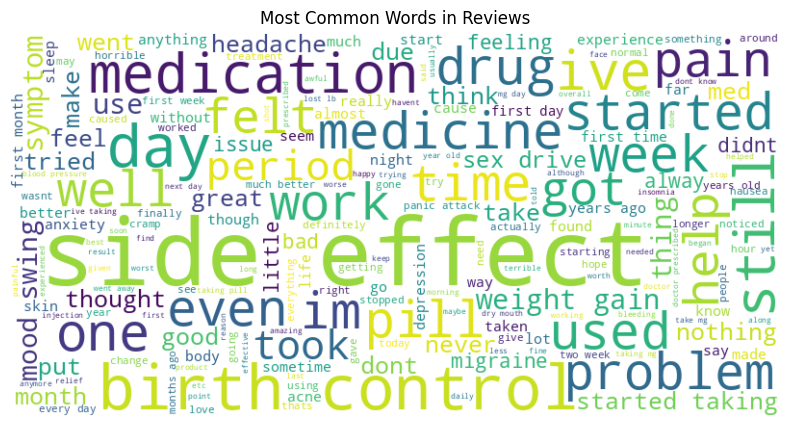

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Most Common Words in Reviews')
plt.show()

<Figure size 1200x600 with 0 Axes>

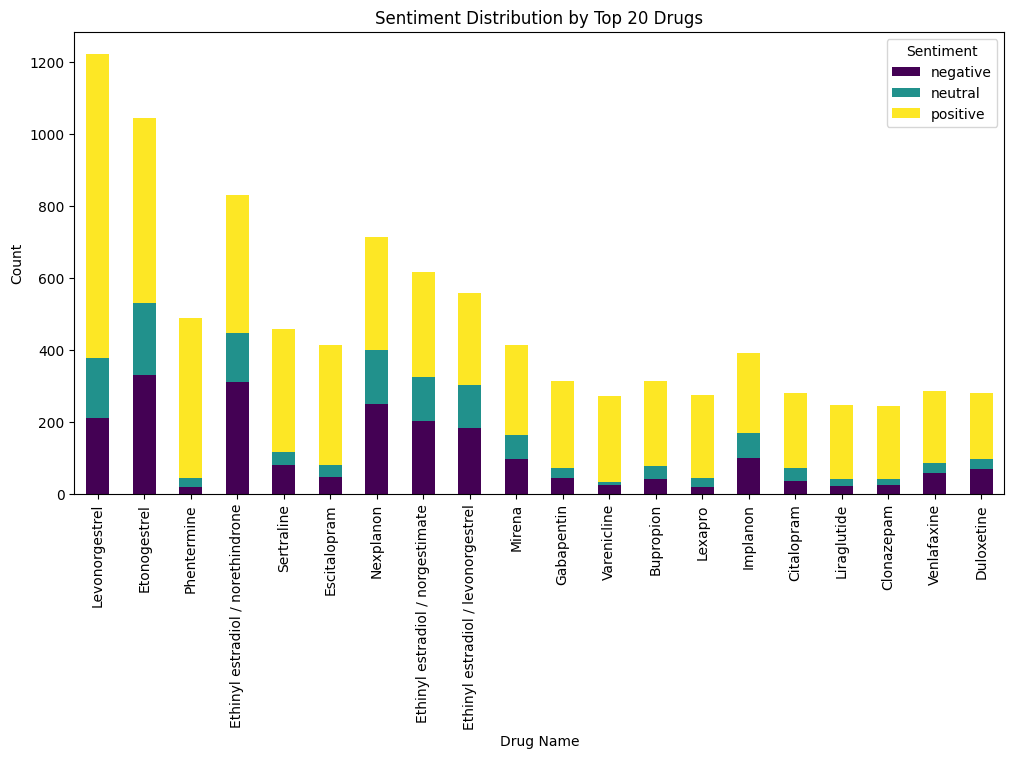

In [ ]:
plt.figure(figsize=(12, 6))
drug_sentiment = df.groupby('drugName')['sentiment'].value_counts().unstack().fillna(0)
drug_sentiment.sort_values(by='positive', ascending=False).head(20).plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Sentiment Distribution by Top 20 Drugs')
plt.ylabel('Count')
plt.xlabel('Drug Name')
plt.legend(title='Sentiment')
plt.show()

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

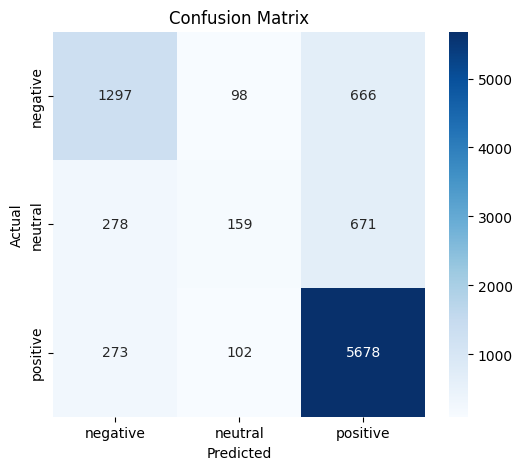

In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=sentiment_mapping.keys(), yticklabels=sentiment_mapping.keys())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()